<a href="https://colab.research.google.com/github/wjseoduq3/metacodeProject01/blob/main/addidas_US_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 출처: https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

# 기본 인프라 셑업

In [ ]:
# colab - Google Drive Mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install xlrd
# !pip install openpyxl

In [ ]:
# pandas, numpy, matplotlib, seaborn 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime as dt

In [ ]:
# 한글 폰트 설치

!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.5 MB/s eta 0:00:00


# === adidas US slaes 1차 project ===

# 데이터 불러오기 및 행, 열 정제

In [ ]:
# 데이터 불러오기

adidas = pd.read_excel("/content/drive/MyDrive/MetaCodeProject/Adidas_US_Sales_Datasets.xlsx")

# 기본정보 확인

#### 불러온 데이터프레임의 'Invoice Date' 컬럼의 데이터 형태가 날수(453021) 형태로 되어 있어서 pd.to_timedelta 함수를 사용하여 datetime64 형태로 변경하고, 'Invoice Date' 컬럼을 삭제하고 그 자리에 새로 생성한 datetime64 데이터의 컬럼을 대체하여 강의 내용과 맞춰줌.

In [ ]:
adidas['Sale Date']= pd.to_timedelta(adidas['Invoice Date'].astype('float'), unit='D') + pd.to_datetime('1900/01/01')

In [ ]:
adidas.drop('Invoice Date', axis=1, inplace=True)

In [ ]:
adidas = adidas[['Retailer', 'Retailer ID', 'Sale Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]
adidas.head()

,Retailer,Retailer ID,Sale Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
adidas.columns.unique()

Index(['Retailer', 'Retailer ID', 'Sale Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Sale Date         9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
adidas.describe()

,Retailer ID,Sale Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-12 15:20:44.776119040,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-03 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-19 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-06 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-18 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2022-01-02 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [ ]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

# 전처리

#### 컬럼내에 있는 '% $ ,'를 삭제해주는 처리 --> 5개 컬럼: 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin'
==> 내가 불러온 파일에서는 필요가 없음!  단, 'Units Sold'만 int type에서 float type으로 변경하여 강의와 맞춰줌.

In [ ]:
# adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[%$,]', '').astype(float)
# adidas['Units Sold'] = adidas['Units Sold'].str.replace('[%$,]', '').astype(float)
# adidas['Total Sales'] = adidas['Total Sales'].str.replace('[%$,]', '').astype(float)
# adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[%$,]', '').astype(float)
# adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[%$,]', '').astype(float)

In [ ]:
adidas['Units Sold'] = adidas['Units Sold'].astype(float)
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Sale Date         9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


In [ ]:
adidas.head()

,Retailer,Retailer ID,Sale Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


#### 'Sale Date' 컬럼에서 연도와 월만 별도로 추출하여 별도의 컬럼을 생성

In [ ]:
adidas['year'] = adidas['Sale Date'].dt.year
adidas['month'] = adidas['Sale Date'].dt.month
adidas.head()

,Retailer,Retailer ID,Sale Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


#### 'Retailer ID'컬럼: int64 type을 object type으로 변환시켜줌

In [ ]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype(str)

In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Sale Date         9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

#### 결측치는 없으나 확인은 해봄

In [ ]:
adidas.isnull().sum()

Retailer            0
Retailer ID         0
Sale Date           0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
year                0
month               0
dtype: int64

# 월별 판매량 분석

In [ ]:
adidas.describe()

,Sale Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-12 15:20:44.776119040,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.867123,6.453151
min,2020-01-03 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000
25%,2021-02-19 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000,3.000000
50%,2021-06-06 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000,6.000000
75%,2021-09-18 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000,9.000000
max,2022-01-02 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2022.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.342500,3.454645


#### 판매량('Unit solds')를 년, 월별로 집계하여(groupby) line_plot으로 확인

<Axes: xlabel='year,month'>

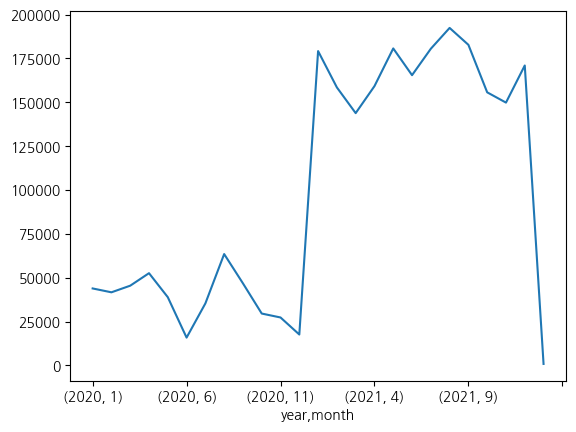

In [ ]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

#### 위의 그래프에서 2020.11 이후 매출이 급증하여 유지되는 현상 발견 --> 원인 파악의 필요성 있음(코로나 영향으로 추측)

In [ ]:
adidas.groupby(['year', 'month'])['Units Sold'].sum()

year  month
2020  1         43903.0
      2         41702.0
      3         45477.0
      4         52609.0
      5         38926.0
      6         15880.0
      7         35368.0
      8         63508.0
      9         46802.0
      10        29595.0
      11        27354.0
      12        17638.0
2021  1        179206.0
      2        158497.0
      3        143839.0
      4        159226.0
      5        180717.0
      6        165476.0
      7        180538.0
      8        192410.0
      9        182777.0
      10       155696.0
      11       149840.0
      12       170996.0
2022  1           881.0
Name: Units Sold, dtype: float64

In [ ]:
adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,43903.0,41702.0,45477.0,52609.0,38926.0,15880.0,35368.0,63508.0,46802.0,29595.0,27354.0,17638.0
2021,179206.0,158497.0,143839.0,159226.0,180717.0,165476.0,180538.0,192410.0,182777.0,155696.0,149840.0,170996.0
2022,881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 유통채널별로 확인 필요 --> 온라인 유통채널의 판매량 급증 의심을 확인하기 위해!

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      26892.0      NaN            NaN      NaN    17011.0
     2          NaN      18095.0      NaN            NaN      NaN    23607.0
     3          NaN      26160.0      NaN            NaN      NaN    19317.0
     4          NaN       3706.0      NaN            NaN  19252.0    29651.0
     5          NaN       2071.0      NaN         4584.0  13844.0    18427.0
     6          NaN          NaN      NaN            NaN      NaN    15880.0
     7          NaN          NaN      NaN        12636.0   1630.0    21102.0
     8          NaN      17796.0      NaN        12899.0  26689.0     6124.0
     9          NaN       5625.0      NaN         3893.0  22606.0    14678.0
     10         NaN       4058.0      NaN        12254.0  13283.0        NaN
     11         NaN       7901.0      NaN            NaN   2494.0    16959.0
     12         NaN       8000.0   1197.0            NaN      NaN     8441.0
2021 1      13006.0      40384.0  29952.0        28070.0      NaN    67794.0
     2      14609.0      36526.0  32376.0        25159.0   1617.0    48210.0
     3      13204.0      31078.0  33200.0        37393.0   3409.0    25555.0
     4      12548.0      26734.0  35736.0        49275.0   6784.0    28149.0
     5      15489.0      34547.0  48813.0        40692.0   8007.0    33169.0
     6      17917.0      56210.0  16269.0        23859.0  10949.0    40272.0
     7      19510.0      59407.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      42784.0  15675.0        66050.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90439.0  15359.0    24313.0
     10     17001.0      28590.0  12409.0        60178.0  13204.0    24314.0
     11     21222.0      43466.0  14765.0        30090.0   9090.0    31207.0
     12     20269.0      59664.0  16909.0        32756.0   4323.0    37075.0
2022 1        322.0        559.0      NaN            NaN      NaN        NaN

<Axes: xlabel='year,month'>

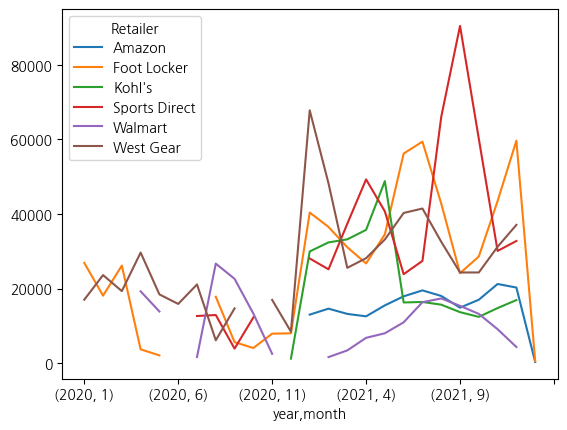

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()

#### 리테일러 내의 리테일러 ID별로 판매량 확인

In [ ]:
adidas.head()

,Retailer,Retailer ID,Sale Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [ ]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


#### 위의 데이터에서 월별 상점수까지 확인

In [ ]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values('Retailer')
df

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1261,Amazon,1185732,2021,8
1255,Amazon,1185732,2021,7
1249,Amazon,1185732,2021,6
1148,Amazon,1185732,2021,10
...,...,...,...,...
557,West Gear,1128299,2020,3
1923,West Gear,1128299,2021,11
1917,West Gear,1128299,2021,10
1905,West Gear,1128299,2021,8


In [ ]:
df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               3
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               14
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13
2022 1                2

<Axes: xlabel='year,month'>

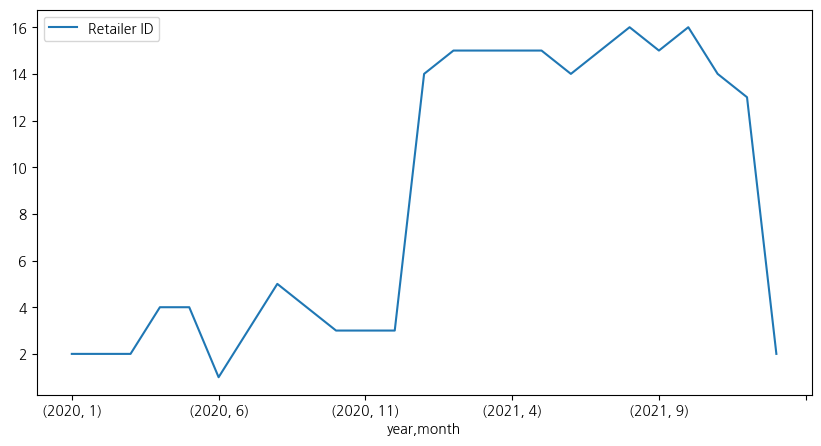

In [ ]:
df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count').plot(kind='line', figsize=(10,5))

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      1.0        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     4.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0
2022 1         1.0          1.0     NaN            NaN      NaN        NaN

<Axes: xlabel='year,month'>

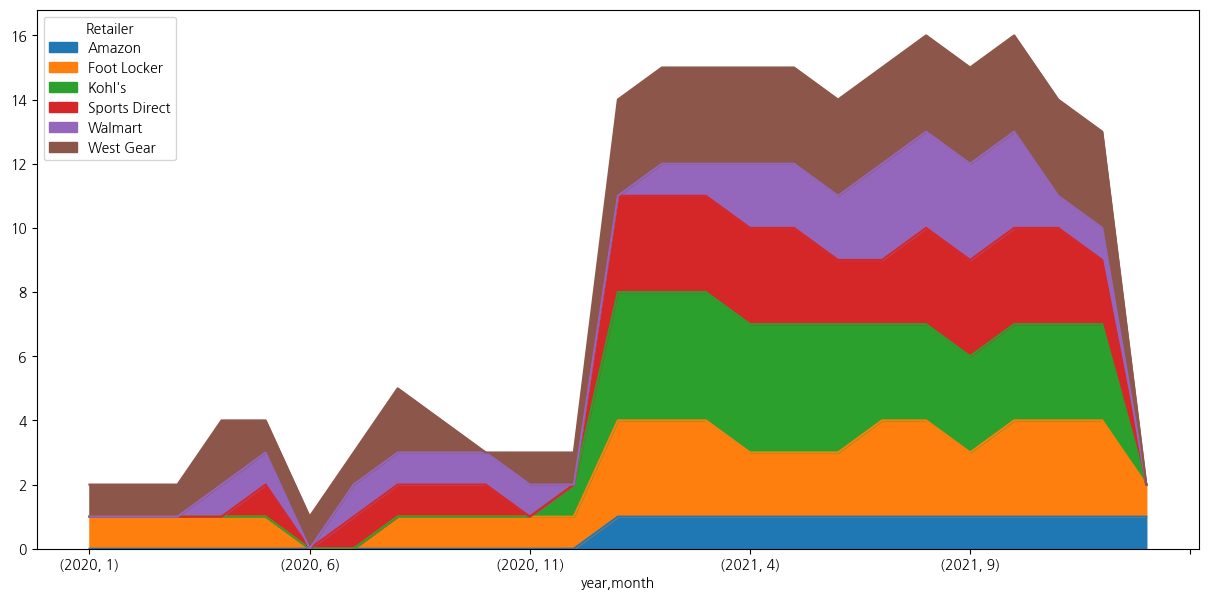

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', figsize=(15,7))

# adidas는 2020년에 매출이 급감했다가 2021년 매출이 회복세로 급증했음 --> 코로나 백신의 영향으로 추정 @ 근거 자료는 "statista" + "보건산업진흥원-2021. 6.14 기준 미국 내 코로나19 일일 감염자 수" 그래프

# === adidas US slaes 1차 project ===

# 마진율 분석

In [ ]:
adidas.head()

,Retailer,Retailer ID,Sale Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [ ]:
adidas.groupby('year').agg({'Operating Margin':'mean'})

,Operating Margin
year,
2020,0.403831
2021,0.425991
2022,0.395000


<Axes: xlabel='year,month'>

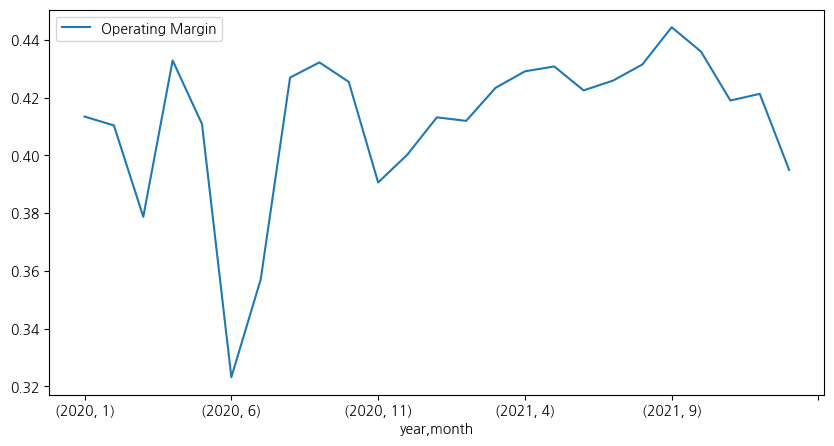

In [ ]:
adidas.pivot_table(index=['year', 'month'], values='Operating Margin', aggfunc='mean').plot(kind='line', figsize=(10,5))

<Axes: xlabel='year,month'>

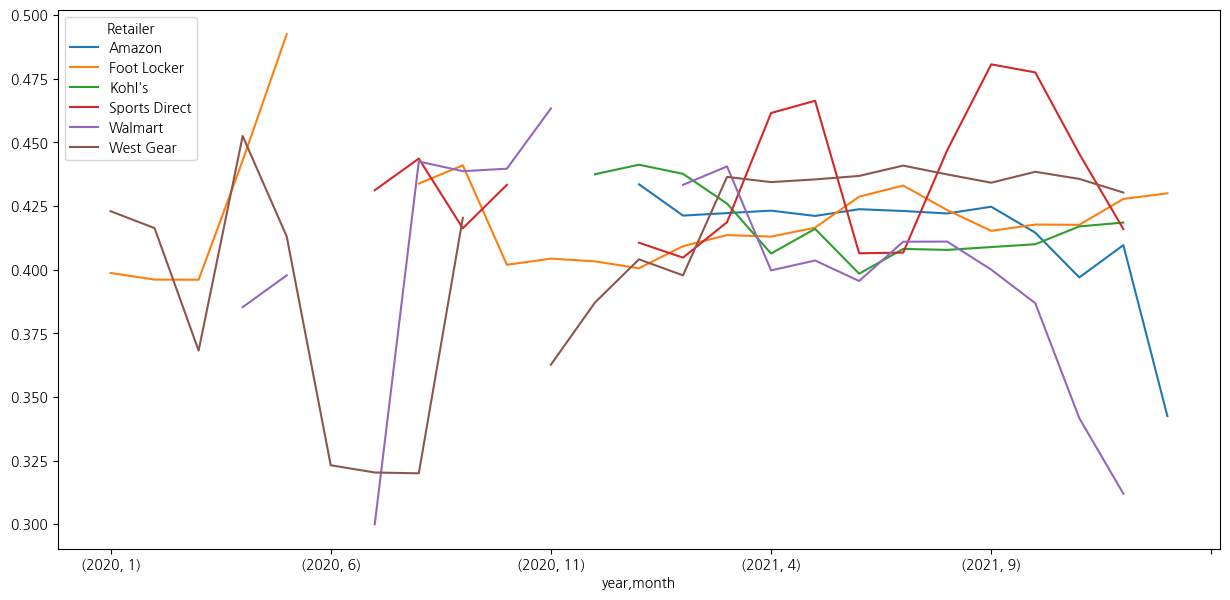

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Operating Margin', aggfunc='mean').plot(kind='line', figsize=(15,7))

# 판매방법에 따른 분석(마진율/판매단가)

<Axes: title={'center': 'Price per Unit'}, xlabel='year,month'>

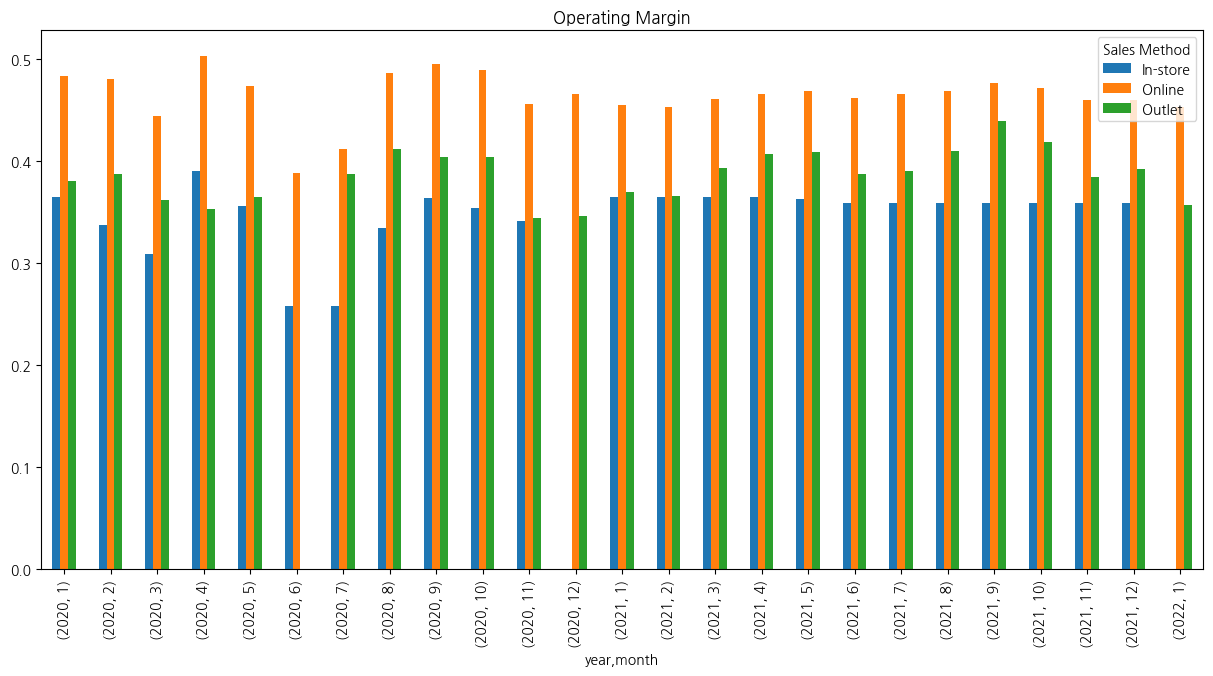

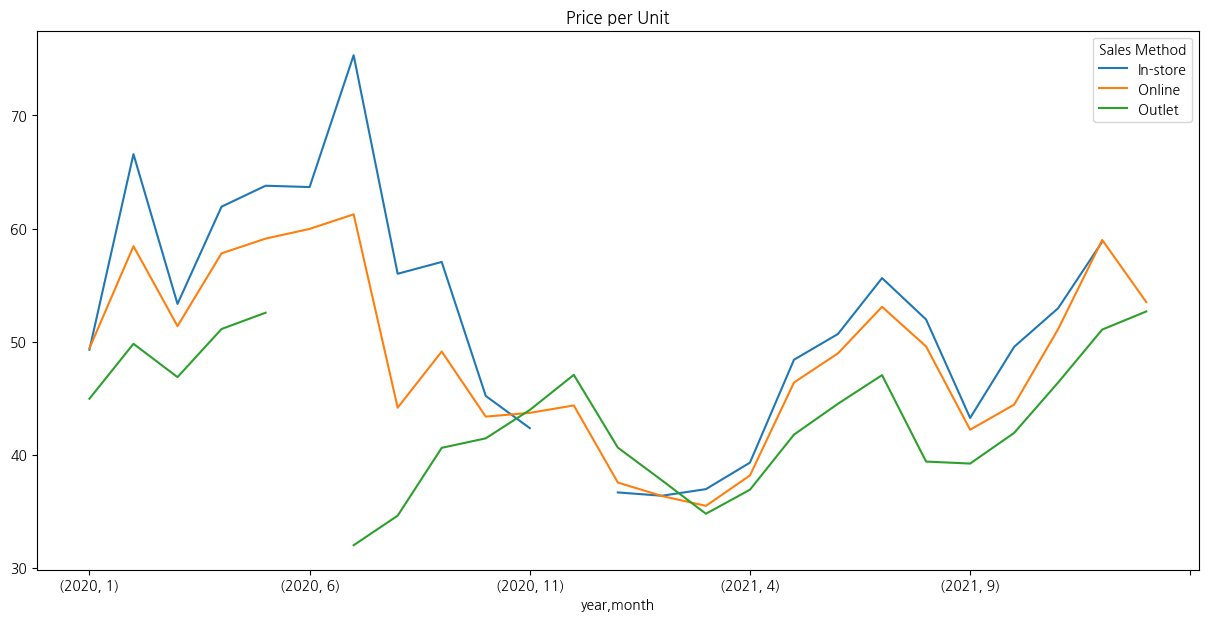

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Sales Method', values='Operating Margin', aggfunc='mean').plot(kind='bar', figsize=(15,7), title='Operating Margin')
adidas.pivot_table(index=['year', 'month'], columns='Sales Method', values='Price per Unit', aggfunc='mean').plot(kind='line', figsize=(15,7), title='Price per Unit')

### 정리:
마진율: 온라인 > 아울렛 > 인_스토어
판매단가: 인_스토어 > 온라인 > 아울렛
추정 가능 사실: 온라인의 원가가 인_스토어에 비해 높을 것이다.
최근 유통의 축이 온라인 중심으로 확대되는 현상을 일부 설명해주는 근거가 될수 있다

# 판매방법에 따라 판매성과에 차이가 있을까?(분산분석)

#### 일원배치 분산분석(ANOVA)을 이용한 통계적 검증
세 개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법

최소자승법(OLS)를 이용하여검증 가능

## BoxPlot을 이용한 시각화

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

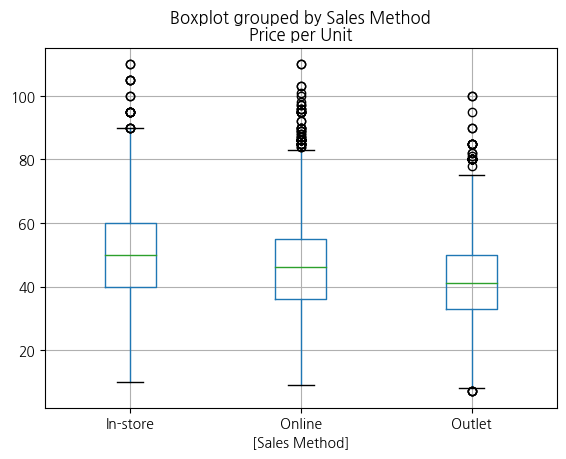

In [ ]:
adidas[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method')

<Axes: title={'center': 'Operating Margin'}, xlabel='[Sales Method]'>

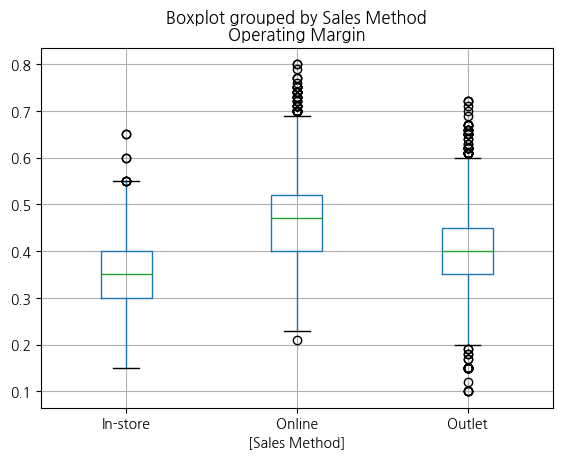

In [ ]:
adidas[['Sales Method', 'Operating Margin']].boxplot(by='Sales Method')

# 통계적 검증: ANOVA

## ANOVA 모듈 임포트

#### 독립변수: 비교 그룹(인_스토어, 온라인, 아울렛), 종속변수: Operating Margin, Price per Unit


In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
x = 'Sales Method'
y = 'Operating Margin'

In [ ]:
df = adidas[[x, y]]
df

,Sales Method,Operating Margin
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


#### 띄어쓰기가 있는 경우 statsmodels의 ols 함수가 인식하지 못함 --> 띄어쓰기를 언더바로 바꿈

In [ ]:
 x = x.replace(' ', '_')
 y = y.replace(' ', '_')
 print("바뀐 변수명: ", x, ":", y )

바뀐 변수명:  Sales_Method : Operating_Margin


In [ ]:
df.columns = [x, y]
df.columns

Index(['Sales_Method', 'Operating_Margin'], dtype='object')

In [ ]:
model = ols(f'{y} ~ C({x})', data=df).fit()

In [ ]:
anova_tb = anova_lm(model)
print(anova_tb)

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [ ]:
if anova_tb.iloc[0, 4] < 0.05:
    print(f"판매방법에 따른 {y}가 유의미한 차이가 있다.")
else:
    print(f"판매방법에 따른 {y}가 유의미한 차이가 없다.")

판매방법에 따른 Operating_Margin가 유의미한 차이가 있다.


In [ ]:
def anova_analysis(x, y):
    df = adidas[[x, y]]

    x = x.replace(' ', '_')
    y = y.replace(' ', '_')

    df.columns = [x, y]

    model = ols(f'{y} ~ C({x})', data=df).fit()

    anova_tb = anova_lm(model)
    print(anova_tb)

    if anova_tb.iloc[0, 4] < 0.05:
        print(f"판매방법에 따른 {y}가 유의미한 차이가 있다.")
    else:
        print(f"판매방법에 따른 {y}가 유의미한 차이가 없다.")

In [ ]:
print("판매가격의 차이 검증")
anova_analysis('Sales Method', 'Price per Unit')
print('\r\n')
print('='*30)
print('\r\n')
print("마진율의 차이 검증")
anova_analysis('Sales Method', 'Operating Margin')

판매가격의 차이 검증
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
판매방법에 따른 Price_per_Unit가 유의미한 차이가 있다.




마진율의 차이 검증
                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
판매방법에 따른 Operating_Margin가 유의미한 차이가 있다.


# 마지막으로 분석결과에 대한 자신만의 해석을 기술해야 함!